In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np

In [141]:
log_sizes = [100, 500]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/log0/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)

[0.8439004550718879, 0.8426700367899498]
[0.8440907614521516, 0.8420873660217761]
[0.8434613581040238, 0.8433544115728346]
[0.8443191709771224, 0.8429831376471691]
[0.8427865115586285, 0.8428009938988991]
[0.9344958851984342, 0.9064582988593403]
[0.8293805523241816, 0.7245923895630569]
[0.7568503609014661, 0.70198019234391]
[0.7472281187407147, 0.6784172571268741]
[0.7283522604016505, 0.6642899748646917]


In [142]:
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

0.8673107093578427
0.8673107114012673


In [143]:
# deviation_precision_0 = [[element - constant_value for element in row] for row in data_precision_0]
# deviation_recall_0 = []

# for row in data_precision_0:
#     new_row = [element - constant_value for element in row]
#     deviation_precision_0.append(new_row)
    
# for row in data_recall_0:
#     new_row = [element - constant_value for element in row]
#     deviation_recall_0.append(new_row)

# Print the result

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )
# print(deviation_recall_0)

[[0.02341025428595478, 0.02464067256789293], [0.023219947905691152, 0.025223343336066573], [0.02384935125381893, 0.023956297785008074], [0.022991538380720322, 0.024327571710673568], [0.02452419779921422, 0.02450971545894365]]
[[0.06718517379716693, 0.03914758745807301], [0.037930159077085635, 0.14271832183821032], [0.11046035049980119, 0.1653305190573573], [0.12008259266055255, 0.1888934542743932], [0.1389584509996168, 0.2030207365365756]]


In [144]:
x_labels = ['100', '500']
y_labels = ['0', '5', '10', '15', '20']

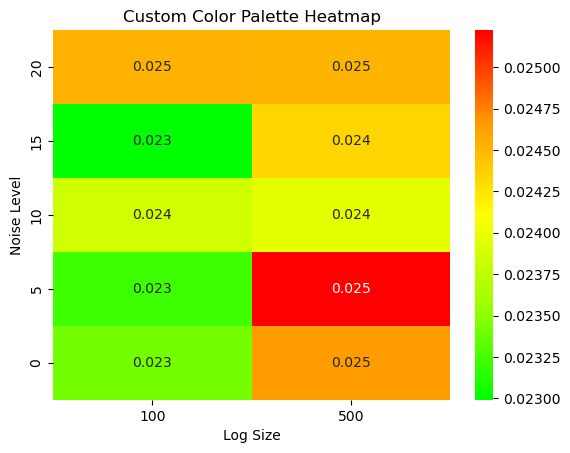

In [145]:
boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Custom Color Palette Heatmap")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.show()

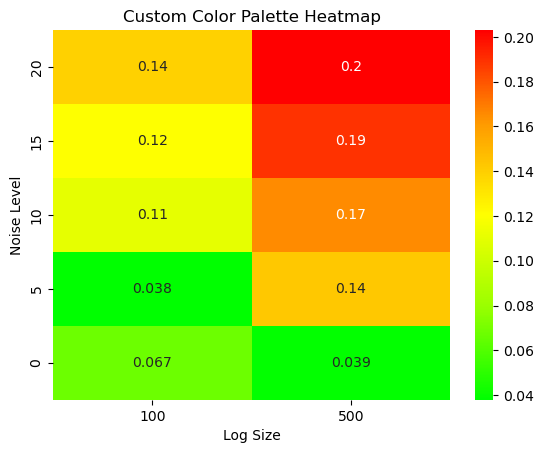

In [146]:
boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Custom Color Palette Heatmap")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.show()